# 0. Setup

## 0.1. Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import pandas as pd
import tensorflow as tf
import numpy as np
import uncertainty_libr as unc
import matplotlib.pyplot as plt
from scipy.special import erfinv
from math import sqrt, erf

from sklearn import preprocessing
from math import pi
from sklearn import metrics as me
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold


In [3]:
print(tf.__version__)

2.3.0


## 0.2. Data processing

In [4]:
dataset = pd.read_csv(r"../Data/Uncertainty/Concrete_data.csv")

In [5]:
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
dataset.describe(include='all')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
dataset.fillna(0)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [8]:
dataset.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
train_dataset,test_dataset = train_test_split(dataset,test_size=0.2,random_state=42)

In [10]:
label_column = 'Concrete compressive strength(MPa, megapascals) '
input_column = train_dataset.columns.drop([label_column])

In [11]:
x_train = train_dataset[input_column].astype(np.float32)
y_train = train_dataset[label_column].astype(np.float32)

x_test = test_dataset[input_column].astype(np.float32)
y_test = test_dataset[label_column].astype(np.float32)

In [12]:
y_train_var = (dataset[label_column]-np.mean(dataset[label_column]))/np.std(dataset[label_column])

In [13]:
(np.max(y_train_var)-np.min(y_train_var))

4.807268937758327

In [14]:
np.sqrt(0.053*np.std(dataset[label_column])+np.mean(dataset[label_column]))

6.058294774664952

In [15]:
y_t = dataset[label_column].values

In [16]:
2*(np.std(y_test)*sqrt(2)*erfinv(0.95))/(np.max(y_test)-np.min(y_test))

0.8903909253794308

## 0.4 Certainty Losses

In [153]:
def ECE_normal_loss(y_actual,y_pred):
    return unc.tf_ECE(y_actual[:,0],y_pred[:,0],y_pred[:,1],'normal',RMSE_mult=1,CE_mult=1,mpiw_mult=0.125)

def ECE_log_normal_loss(y_actual,y_pred):
    return unc.tf_ECE(y_actual[:,0],y_pred[:,0],y_pred[:,1],'log_normal',RMSE_mult=1,CE_mult=1,mpiw_mult=0.1)

def ECE_logistic_loss(y_actual,y_pred):
    return unc.tf_ECE(y_actual[:,0],y_pred[:,0],y_pred[:,1],'logistic',RMSE_mult=1,CE_mult=1,mpiw_mult=0.05)

def ECE_shifted_rayleigh_loss(y_actual,y_pred):
    return unc.tf_ECE(y_actual[:,0],y_pred[:,0],y_pred[:,1],'shifted_rayleigh',RMSE_mult=1,CE_mult=1,mpiw_mult=0.1)

def ECE_loss_normal_distr(y_actual,y_pred):
    return unc.tf_ECE_normal(y_actual[:,0],y_pred[:,0],y_pred[:,1])

def ECE_loss_shifted_log_normal_distr(y_actual,y_pred):
    return unc.tf_shifted_log_normal(y_actual[:,0],y_pred[:,0],y_pred[:,1],y_pred[:,2])

def QD_loss(y_actual,y_pred):
    return unc.tf_qd(y_actual[:,0],y_pred[:,0],y_pred[:,1],lambda_=0.40)

# 1. Neural Network

## 1.1. Preprocessing Setup

In [123]:
from sklearn.feature_selection import SelectKBest, f_regression

In [124]:
BATCH_SIZE=128

In [125]:
scale = True
if scale:
    x_scaler = preprocessing.MinMaxScaler((0, 1))
    y_scaler = preprocessing.MinMaxScaler((0, 1))
    #x_scaler = preprocessing.StandardScaler((0, 1))
    #y_scaler = preprocessing.StandardScaler((0, 1))

    processed_x_train = x_scaler.fit_transform(x_train)
    processed_y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

    processed_x_test = x_scaler.transform(x_test)
    processed_y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

else:
    processed_x_train = x_train.values
    processed_y_train = y_train.values.reshape(-1, 1)

    processed_x_test = x_test.values
    processed_y_test = y_test.values.reshape(-1,1)

In [126]:
inp_dim = processed_x_test.shape[1]

In [127]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        processed_x_train,
        processed_y_train
    )
).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        processed_x_test,    
        processed_y_test
    )
).batch(BATCH_SIZE)

## 1.2. NN Setup

In [163]:
inp_dim = processed_x_test.shape[1]
LEARNING_RATE = 0.005
DECAY = 0.98
N_EPOCHS = 800
TOLERANCE = 0.005
early_stopping = False

In [176]:
def loss(model, x, y,distr):
    #return tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y, model(x))))
    
    #return ECE_shifted_rayleigh_loss(y,model(x))
    #return ECE_loss_normal_distr(y,model(x))
    
    """if distr=="shifted_rayleigh":
        return ECE_shifted_rayleigh_loss(y,model(x))
    elif distr=="logistic":
        return ECE_logistic_loss(y,model(x))
    elif distr=='normal':
        return ECE_normal_loss(y,model(x))"""
    
    #return ECE_log_normal_loss(y,model(x))

    #return ECE_loss_shifted_log_normal_distr(y,model(x))
    
    return QD_loss(y,model(x))

def grad(model, inputs, targets,distr):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets,distr)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [177]:
def ECE_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(inp_dim, activation='relu'),
        #tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(50, activation='relu'),
        #tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(2, activation='linear',bias_initializer=tf.keras.initializers.Constant(value=[1.0,0.0])) 
    ])

    #model.compile(loss=ECE_loss_normal,
    #            optimizer=tf.keras.optimizers.Adam(0.001))
    return model

## 1.3. NN Training

In [178]:
Runs = 5
Ensembles = 5
alpha=0.1
distr="normal"

n_std_devs = sqrt(2.0)*erfinv(1-alpha)

In [179]:
RMSE_t = []
MAE_t = []
ME_t =[]
R2_t =[]
pinaw_t = []
pinaw_p_t = []
picp_t = []
adce_t = []
dce_t = []

eval_p = 0.95

import tqdm
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=DECAY)#0.0005)

for i in range(Runs):
    y_pred_all = []
    
    for j in range(Ensembles):
        print("Starting run "+str(i+1)+" of "+str(Runs)+" -- with ensemble "+str(j+1)+" of "+str(Ensembles))

        real_model=ECE_model()

        # Keep results for plotting
        real_train_loss_results = []
        real_test_loss_results = []

        for epoch in range(N_EPOCHS):
            epoch_train_loss_avg = tf.keras.metrics.Mean()
            epoch_test_loss_avg = tf.keras.metrics.Mean()
            # Training loop - using batches of 32    

            for x,y in train_dataset:#,ascii=True,desc='Training epoch '+str(epoch)):
                # Optimize the model
                loss_value, grads = grad(real_model, x, y,distr)
                optimizer.apply_gradients(zip(grads, real_model.trainable_variables))
                # Track progress
                epoch_train_loss_avg(loss_value)  # Add current batch loss
                # End epoch

            for x,y in test_dataset:
                # Optimize the model
                loss_value = loss(real_model, x, y,distr)
                # Track progress
                epoch_test_loss_avg(loss_value)  # Add current batch loss
                # End epoch

            real_train_loss_results.append(epoch_train_loss_avg.result())
            real_test_loss_results.append(epoch_test_loss_avg.result())

            if epoch > 0:
                if early_stopping and (real_test_loss_results[epoch] - min_real_test_loss_results > TOLERANCE * min_real_test_loss_results):
                    print(f'Early stopping at epoch {epoch} using tolerance {TOLERANCE}.')
                    print("Epoch {:03d}: Train Loss: {:.3f}".format(epoch, epoch_train_loss_avg.result()))
                    print("Epoch {:03d}: Test Loss: {:.3f}".format(epoch, epoch_test_loss_avg.result()))
                    break
                else:
                    min_real_test_loss_results = tf.minimum(min_real_test_loss_results, epoch_test_loss_avg.result())
            else:
                min_real_test_loss_results = epoch_test_loss_avg.result()

            if epoch % 100 == 0:
                print("Epoch {:03d}: Train Loss: {:.3f}".format(epoch, epoch_train_loss_avg.result()))
                print("Epoch {:03d}: Test Loss: {:.3f}".format(epoch, epoch_test_loss_avg.result()))

        print("\n")
        pred_arr = processed_x_test
        test_arr = processed_y_test
        out=real_model.predict(pred_arr)

        y_pred_all.append(out)
        
        print("PICP: "+str(unc.PICP(out[:,0],out[:,1],test_arr[:,0])))
        print("NMIPW: "+str(unc.tf_PINAW_one_dim(test_arr[:,0],out[:,1],out[:,0]).numpy()))
        res,values,ece,pinaw_plot,dce_width,widths=unc.tf_ce_plot(test_arr,out[:,0],out[:,1],'normal')
        print("ACE: "+str(ece.numpy()))
        print("\n")

    y_pred_all = tf.convert_to_tensor(y_pred_all,dtype=np.float32)

    upper = tf.reduce_mean(y_pred_all[:,:,0],axis=0)+n_std_devs*tf.math.reduce_std(y_pred_all[:,:,0],axis=0)/tf.math.sqrt(float(y_pred_all.shape[0]))
    lower = tf.reduce_mean(y_pred_all[:,:,1],axis=0)-n_std_devs*tf.math.reduce_std(y_pred_all[:,:,1],axis=0)/tf.math.sqrt(float(y_pred_all.shape[0]))

    up_temp = tf.math.maximum(upper,lower)
    lower = tf.math.minimum(upper,lower)
    upper=up_temp
    
    distr = 'normal'

    #pinaw = unc.tf_PINAW_one_dim(test_arr[:,0],upper,lower).numpy()
    sigm = unc.tf_calculate_sigma(upper,lower,distr)
    Y_pred,diff=unc.tf_calculate_mean(upper,lower,sigm,distr)
    dce = 2*np.mean(res-values)
    
    if distr =="logistic":
        p_low = (1-eval_p)/2
        p_up = (1+eval_p)/2
        upper_p=Y_pred+sigm*np.log(p_up/(1-p_up))
        lower_p=Y_pred+sigm*np.log(p_low/(1-p_low))
        
    elif distr =="shifted_rayleigh":
        p_low = (1-eval_p)/2
        p_up = (1+eval_p)/2
        upper_p=Y_pred-sigm+sqrt(-2*np.log(1-p_up))*sigm
        lower_p=Y_pred-sigm+sqrt(-2*np.log(1-p_low))*sigm
        
    elif distr =="normal":
        upper_p=Y_pred+sigm*sqrt(2)*erfinv(eval_p)
        lower_p=Y_pred-sigm*sqrt(2)*erfinv(eval_p)
    
    
    pinaw = unc.tf_PINAW_one_dim(test_arr[:,0],upper_p,lower_p).numpy()
    sigm = unc.tf_calculate_sigma(upper,lower,distr)
    Y_pred,diff=unc.tf_calculate_mean(upper,lower,sigm,distr)
    res,values,adce,pinaw_plot,dce_width,widths=unc.tf_ce_plot(test_arr,upper,lower,distr)
    pinaw_p = pinaw_plot[np.where(res.numpy()>=eval_p)[0][0]].numpy()
    dce = 2*np.mean(res-values)
    hard_picp = unc.PICP(upper_p,lower_p,test_arr[:,0])
    R2_total,RMSE_total,MAE_total,ME_total = unc.scores_calc_print(y_scaler.inverse_transform(Y_pred.numpy().reshape(-1,1)),y_scaler.inverse_transform(test_arr),False)


    RMSE_t = np.append(RMSE_t,RMSE_total)
    MAE_t = np.append(MAE_t,MAE_total)
    ME_t =np.append(ME_t,ME_total)
    R2_t =np.append(R2_t,R2_total)
    pinaw_t = np.append(pinaw_t,pinaw)
    pinaw_p_t = np.append(pinaw_p_t,pinaw_p)
    picp_t = np.append(picp_t,hard_picp)
    adce_t = np.append(adce_t,adce)
    dce_t = np.append(dce_t,dce)

Starting run 1 of 5 -- with ensemble 1 of 5
Epoch 000: Train Loss: 0.782
Epoch 000: Test Loss: 0.760
Epoch 100: Train Loss: 0.230
Epoch 100: Test Loss: 0.279
Epoch 200: Train Loss: 0.195
Epoch 200: Test Loss: 0.278
Epoch 300: Train Loss: 0.199
Epoch 300: Test Loss: 0.252
Epoch 400: Train Loss: 0.191
Epoch 400: Test Loss: 0.231
Epoch 500: Train Loss: 0.173
Epoch 500: Test Loss: 0.262
Epoch 600: Train Loss: 0.167
Epoch 600: Test Loss: 0.278
Epoch 700: Train Loss: 0.168
Epoch 700: Test Loss: 0.248


PICP: 0.7427184466019418
NMIPW: 0.17404982
ACE: 0.24472073


Starting run 1 of 5 -- with ensemble 2 of 5
Epoch 000: Train Loss: 1.042
Epoch 000: Test Loss: 0.739
Epoch 100: Train Loss: 0.226
Epoch 100: Test Loss: 0.284
Epoch 200: Train Loss: 0.197
Epoch 200: Test Loss: 0.249
Epoch 300: Train Loss: 0.186
Epoch 300: Test Loss: 0.256
Epoch 400: Train Loss: 0.181
Epoch 400: Test Loss: 0.260
Epoch 500: Train Loss: 0.192
Epoch 500: Test Loss: 0.234
Epoch 600: Train Loss: 0.173
Epoch 600: Test Loss: 

In [180]:
print(10*"-"+"RESULTS of "+str(Runs)+" runs"+10*"-")
print(f"RMSE: {np.mean(RMSE_t):.3f} +/- ({np.std(RMSE_t)/np.sqrt(Runs):.3f})")
print(f"MAE: {np.mean(MAE_t):.3f} +/- ({np.std(MAE_t)/np.sqrt(Runs):.3f})")
print(f"ME: {np.mean(ME_t):.3f} +/- ({np.std(ME_t)/np.sqrt(Runs):.3f})")
print(f"R2: {np.mean(R2_t):.3f} +/- ({np.std(R2_t)/np.sqrt(Runs):.3f})")
print(f"NMPIW: {np.mean(pinaw_t):.3f} +/- ({np.std(pinaw_t)/np.sqrt(Runs):.3f})")
print(f"NMPIW_p: {np.mean(pinaw_p_t):.3f} +/- ({np.std(pinaw_p_t)/np.sqrt(Runs):.3f})")
print(f"PICP: {np.mean(picp_t):.3f} +/- ({np.std(picp_t)/np.sqrt(Runs):.3f})")
print(f"ADCE: {np.mean(adce_t):.3f} +/- ({np.std(adce_t)/np.sqrt(Runs):.3f})")
print(f"DCE: {np.mean(dce_t):.3f} +/- ({np.std(dce_t)/np.sqrt(Runs):.3f})")

----------RESULTS of 5 runs----------
RMSE: 5.901 +/- (0.149)
MAE: 4.691 +/- (0.132)
ME: -0.789 +/- (0.112)
R2: 0.833 +/- (0.007)
NMPIW: 0.312 +/- (0.008)
NMPIW_p: 0.279 +/- (0.007)
PICP: 0.974 +/- (0.002)
ADCE: 0.046 +/- (0.008)
DCE: -0.029 +/- (0.012)


## 1.4. NN Evaluation

In [ ]:
pred_arr = processed_x_test#processed_x_train
test_arr = processed_y_test#processed_y_train

out=real_model.predict(pred_arr)[:,0]
unc.scores_calc_print(y_scaler.inverse_transform(out.reshape(-1,1)),y_scaler.inverse_transform(test_arr),True)

In [ ]:
pred_arr = processed_x_test#processed_x_train
test_arr = processed_y_test#processed_y_train

out=real_model.predict(pred_arr)

upper=out[:,0]
lower=out[:,1]
        

distr = 'normal'

pinaw = unc.tf_PINAW_one_dim(test_arr[:,0],upper,lower).numpy()
#pinaw = PINAW(processed_y_test[:,0],upper,lower)

sigm = unc.tf_calculate_sigma(upper,lower,distr)
#up,low = tf_calculate_mean(upper,lower,sigm,distr)
Y_pred,diff=unc.tf_calculate_mean(upper,lower,sigm,distr)#(up+low)/2
#Y_pred = tf.math.exp(mu-tf.math.square(sigm))+beta

res,values,ece,pinaw_plot,ideal_pinaw_plot=unc.tf_ce_plot(test_arr,upper,lower,distr)

soft_picp = unc.tf_Soft_PICP_one_dim(upper,lower,test_arr[:,0],s=1000).numpy()
print("Soft PICP: "+str(soft_picp))
#print("Soft PICP: "+str(Soft_PICP(upper,lower,processed_y_test,s=1000)))
print("Hard PICP: "+str(unc.PICP(upper,lower,test_arr[:,0])))

In [87]:
unc.scores_calc_print(y_scaler.inverse_transform(Y_pred.numpy().reshape(-1,1)),y_scaler.inverse_transform(test_arr),True)
print("PINAW: "+str(pinaw))

RMSE of total: 5.570138037732944
MAE of total: 4.2695255
MdAE of total: 3.2827425
R² of total: 0.8621586942917512
ME of total: [-0.78815967]
Std of results: 5.514094759121686


PINAW: 0.21356046


In [151]:
res,values,adce,pinaw_plot,dce_width,widths=unc.tf_ce_plot(test_arr,upper,lower,distr)

--
NN ACE: 0.03179335


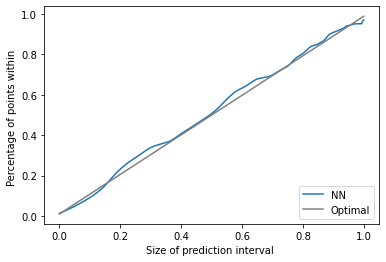

In [156]:
plt.figure(figsize=(6,4))
ax = plt.gca()
print("--")

#diff = np.sum(np.abs(np.subtract(values,res)))
print("NN ACE: "+str(adce.numpy()))
#print("NN CE: "+str(ce))
plt.plot(np.arange(0,1.0,1.0/len(values)),res,label='NN')
plt.plot(np.arange(0,1.0,1.0/len(values)),values,label='Optimal',color='gray')
#plt.scatter(0.9,soft_picp,marker="x",color='red',s=100)
#plt.xticks(np.arange(0, 1.1, 0.1),np.round(values[0::100],2))#, np.round(values[0::10],2))
#plt.locator_params(axis='x', nbins=len(values)/10)
plt.xlabel('Size of prediction interval ')
plt.ylabel('Percentage of points within ')
    
plt.legend(loc='lower right')
plt.show() 

NN PINAW: 0.21356046


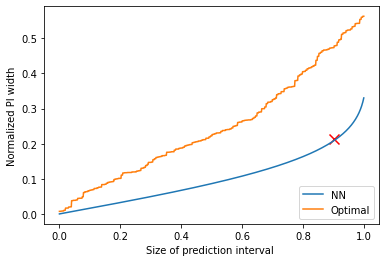

In [89]:
plt.figure(figsize=(6,4))
ax = plt.gca()

#diff = np.sum(np.abs(np.subtract(values,res)))
print("NN PINAW: "+str(pinaw))
#print("NN CE: "+str(ce))
plt.plot(np.arange(0,1.0,1.0/len(values)),pinaw_plot,label='NN')
plt.plot(np.arange(0,1.0,1.0/len(values)),ideal_pinaw_plot,label='Optimal')
plt.scatter(0.9,pinaw,marker="x",color='red',s=100)
#plt.xticks(np.arange(0, 1.1, 0.1),np.round(values[0::100],2))#, np.round(values[0::10],2))
#plt.locator_params(axis='x', nbins=len(values)/10)
plt.xlabel('Size of prediction interval ')
plt.ylabel('Normalized PI width')
    
plt.legend(loc='lower right')
plt.show() 

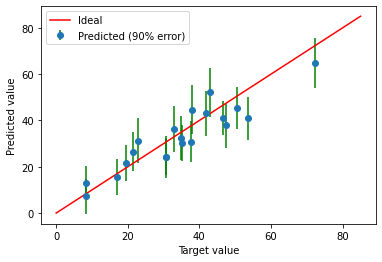

In [90]:
start = 0
end = 20
plt.errorbar(processed_y_test[start:end]/y_scaler.scale_,Y_pred[start:end]/y_scaler.scale_,yerr=np.array([Y_pred-lower,upper-Y_pred])[:,start:end]/y_scaler.scale_, fmt='o',ecolor='green',label='Predicted (90% error)')
plt.plot(np.arange(0,90,5),np.arange(0,90,5),color='red',label='Ideal')
plt.xlabel("Target value")
plt.ylabel("Predicted value")
plt.legend()

In [134]:
print(f'number of parameters in the model {real_model.count_params()}')

number of parameters in the model 624
